<center><h1><b>Basic EDA</b></h1></center>

In [1]:

%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import math

#  I. Loading and display basic information

In [2]:
# load file
DATA_HEAD = Path("data")
file_name = "STORM_RAW_0.3.csv"
target_file =  DATA_HEAD / file_name
raw_df = pd.read_csv(target_file)

raw_df.head()

,ID,EventName,Year,Month,DisasterType,DisasterSubtype,MainLandfallLocation,Flood,Slide,OFDAResponse,Appeal,Declaration,LandfallMagnitude(kph),LandfallPressure(mb),TotalDeaths,NoInjured,TotalDamage(000US$),TotalDamageAdjusted(000US$),CPI
0,STORM_NAN_1953,NaN,1953,9,Storm,Tropical cyclone,8,0,0,0.0,0.0,0.0,NaN,NaN,1000.0,NaN,NaN,NaN,9.156133
1,STORM_VIOLET_1964,Violet,1964,9,Storm,Tropical cyclone,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,94354.08,10.598376
2,STORM_IRIS_1964,Iris,1964,11,Storm,Tropical cyclone,5,1,0,NaN,NaN,NaN,150.0,960.0,5100.0,NaN,70000.0,660478.55,10.598376
3,STORM_JOAN_1964,Joan,1964,11,Storm,Tropical cyclone,5,1,0,NaN,NaN,NaN,130.0,980.0,2500.0,NaN,15000.0,141531.12,10.598376
4,STORM_KATE_1964,Kate,1964,11,Storm,Tropical cyclone,6,1,0,NaN,NaN,NaN,130.0,970.0,0.0,NaN,3000.0,28306.22,10.598376


In [3]:
# cloning df into 2 target
med_df = raw_df.copy()
mean_df = raw_df.copy()

# II. PREPROCESS


In [4]:
raw_df.isnull().sum()

ID                              0
EventName                      22
Year                            0
Month                           0
DisasterType                    5
DisasterSubtype                 2
MainLandfallLocation            0
Flood                           0
Slide                           0
OFDAResponse                   55
Appeal                         56
Declaration                    57
LandfallMagnitude(kph)         26
LandfallPressure(mb)           30
TotalDeaths                    14
NoInjured                      78
TotalDamage(000US$)            39
TotalDamageAdjusted(000US$)    39
CPI                             0
dtype: int64

# Handling NaN Values
1. Numerical columns related to intensity and damage (such as `LandfallMagnitude(kph)`, `LandfallPressure(mb)`): *Fill with mean or median value*, split into 2 df seperate df to research which way is better: These values can be filled with the column average, as it's a safe approach to retain information without distorting the data.

2. Specific columns `TotalDamageAdjusted(000US$)`: first we fill mean or median to `TotalDamage(000US$)`, after that, base on `CPI`, we calculate `TotalDamageAdjusted(000US$)` with their year's CPI

3. Columns related to response and relief declarations (such as `OFDAResponse`, `Appeal`, `Declaration`): *Fill with 0*: If an event has no data on response or declaration, we can assume by default that no response or declaration was made.

4. EventName and `DisasterType`/`DisasterSubtype` columns: *Skip*: These are nonssential columns with **string** data type, so they don't need to be processed.

5. Time and geographical columns (such as `Year`, `MainLandfallLocation`) *have no missing values*, so they don't need to be processed.

In [5]:
def process_adjustedcol(df):
    adjusted = "TotalDamageAdjusted(000US$)"
    origin = "TotalDamage(000US$)"
    cpis = "CPI"
    
    df[adjusted] = (df[origin] / df[cpis]) * 100
    
    return df

# 1. Fill with mean/med to:
numerical_columns = ['LandfallMagnitude(kph)', 'LandfallPressure(mb)', 'TotalDeaths', 
                     'NoInjured', 'TotalDamage(000US$)']
# mean
mean_df[numerical_columns] = raw_df[numerical_columns].fillna(round(raw_df[numerical_columns].mean(),0))
# median
med_df[numerical_columns] = raw_df[numerical_columns].fillna(round(raw_df[numerical_columns].median(),0))

# 2. process Adjusted column:
mean_df = process_adjustedcol(mean_df)
med_df = process_adjustedcol(med_df)

# 3. Fill with 0 to
response_columns = ['OFDAResponse', 'Appeal', 'Declaration']
mean_df[response_columns] = raw_df[response_columns].fillna(0)
med_df[response_columns] = raw_df[response_columns].fillna(0)

# preview na data
mean_df.isnull().sum()

ID                              0
EventName                      22
Year                            0
Month                           0
DisasterType                    5
DisasterSubtype                 2
MainLandfallLocation            0
Flood                           0
Slide                           0
OFDAResponse                    0
Appeal                          0
Declaration                     0
LandfallMagnitude(kph)          0
LandfallPressure(mb)            0
TotalDeaths                     0
NoInjured                       0
TotalDamage(000US$)             0
TotalDamageAdjusted(000US$)     0
CPI                             0
dtype: int64

In [6]:
# comparing differences between 
target_comparing = raw_df.columns[-2]
(mean_df[target_comparing] == med_df[target_comparing]).value_counts()

TotalDamageAdjusted(000US$)
True     145
False     39
Name: count, dtype: int64

`39` differences record are `39 NaN value` on adjusted column

# Handling with dtype
- convert every numerical columns into Int64 except `CPI`

In [7]:
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           184 non-null    object 
 1   EventName                    162 non-null    object 
 2   Year                         184 non-null    int64  
 3   Month                        184 non-null    int64  
 4   DisasterType                 179 non-null    object 
 5   DisasterSubtype              182 non-null    object 
 6   MainLandfallLocation         184 non-null    int64  
 7   Flood                        184 non-null    int64  
 8   Slide                        184 non-null    int64  
 9   OFDAResponse                 184 non-null    float64
 10  Appeal                       184 non-null    float64
 11  Declaration                  184 non-null    float64
 12  LandfallMagnitude(kph)       184 non-null    float64
 13  LandfallPressure(mb)

In [8]:
from src.const import NUMERIC_COLS
NUMERIC_COLS.remove("CPI")
raw_df[NUMERIC_COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         184 non-null    int64  
 1   Month                        184 non-null    int64  
 2   MainLandfallLocation         184 non-null    int64  
 3   Flood                        184 non-null    int64  
 4   Slide                        184 non-null    int64  
 5   OFDAResponse                 129 non-null    float64
 6   Appeal                       128 non-null    float64
 7   Declaration                  127 non-null    float64
 8   LandfallMagnitude(kph)       158 non-null    float64
 9   LandfallPressure(mb)         154 non-null    float64
 10  TotalDeaths                  170 non-null    float64
 11  NoInjured                    106 non-null    float64
 12  TotalDamage(000US$)          145 non-null    float64
 13  TotalDamageAdjusted(

In [9]:
from src.utils import convert_df_dtype

# convert all numerical column into Int64
mean_df = convert_df_dtype(mean_df, "Int64", NUMERIC_COLS)
med_df = convert_df_dtype(med_df, "Int64", NUMERIC_COLS)

In [10]:
# view numerical columns after convert
med_df[NUMERIC_COLS + ["CPI"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         184 non-null    Int64  
 1   Month                        184 non-null    Int64  
 2   MainLandfallLocation         184 non-null    Int64  
 3   Flood                        184 non-null    Int64  
 4   Slide                        184 non-null    Int64  
 5   OFDAResponse                 184 non-null    Int64  
 6   Appeal                       184 non-null    Int64  
 7   Declaration                  184 non-null    Int64  
 8   LandfallMagnitude(kph)       184 non-null    Int64  
 9   LandfallPressure(mb)         184 non-null    Int64  
 10  TotalDeaths                  184 non-null    Int64  
 11  NoInjured                    184 non-null    Int64  
 12  TotalDamage(000US$)          184 non-null    Int64  
 13  TotalDamageAdjusted(

In [11]:
# Shape of data
med_df.shape,  mean_df.shape

((184, 19), (184, 19))

In [12]:
# Summary statistics for numerical columns
mean_stats = mean_df.describe()
med_stats = med_df.describe()

In [13]:
mean_stats

,Year,Month,MainLandfallLocation,Flood,Slide,OFDAResponse,Appeal,Declaration,LandfallMagnitude(kph),LandfallPressure(mb),TotalDeaths,NoInjured,TotalDamage(000US$),TotalDamageAdjusted(000US$),CPI
count,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.000000
mean,2001.456522,8.728261,4.25,0.831522,0.353261,0.086957,0.038043,0.0,92.711957,984.86413,122.956522,142.043478,88492.065217,156899.418478,61.856260
std,14.829385,2.109584,1.702618,0.375312,0.479287,0.28254,0.191823,0.0,35.749717,15.055381,504.886449,245.252626,156420.415404,230479.165149,22.114806
min,1953.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,925.0,0.0,0.0,0.0,0.0,9.156133
25%,1990.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,65.0,980.0,6.0,15.75,5545.0,9116.0,44.645877
50%,2004.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,93.0,985.0,20.0,142.0,44150.0,63155.5,64.541329
75%,2014.0,10.0,5.0,1.0,1.0,0.0,0.0,0.0,111.0,996.0,95.25,142.0,88492.0,189197.5,80.892624
max,2022.0,12.0,11.0,1.0,1.0,1.0,1.0,0.0,176.0,1010.0,5100.0,2502.0,1000000.0,1193926.0,100.000000


In [14]:
med_stats

,Year,Month,MainLandfallLocation,Flood,Slide,OFDAResponse,Appeal,Declaration,LandfallMagnitude(kph),LandfallPressure(mb),TotalDeaths,NoInjured,TotalDamage(000US$),TotalDamageAdjusted(000US$),CPI
count,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.000000
mean,2001.456522,8.728261,4.25,0.831522,0.353261,0.086957,0.038043,0.0,92.570652,985.516304,114.967391,90.326087,73847.565217,118828.070652,61.856260
std,14.829385,2.109584,1.702618,0.375312,0.479287,0.28254,0.191823,0.0,35.750278,15.134001,505.656895,252.602589,158962.454147,213260.863299,22.114806
min,1953.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,925.0,0.0,0.0,0.0,0.0,9.156133
25%,1990.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,65.0,980.0,6.0,15.75,5545.0,9116.0,44.645877
50%,2004.0,9.0,4.0,1.0,0.0,0.0,0.0,0.0,92.0,989.0,18.0,20.0,19400.0,35663.0,64.541329
75%,2014.0,10.0,5.0,1.0,1.0,0.0,0.0,0.0,111.0,996.0,48.25,29.75,55375.0,110734.5,80.892624
max,2022.0,12.0,11.0,1.0,1.0,1.0,1.0,0.0,176.0,1010.0,5100.0,2502.0,1000000.0,1193926.0,100.000000


After loading the data and examining the basic information:

- There are both `numerical` and `categorical` columns in the dataset.
- Size: `184 x 19`

In [15]:
mean_df.to_csv(DATA_HEAD / "STORM_preprocessed_meanfill_1.csv")
med_df.to_csv(DATA_HEAD / "STORM_preprocessed_medianfill_1.csv")

# III. Visualizing basic view of data

Because the `median` and `mean` fillna way has not much affect on distribution so we only visualize and testing on `mean` way

In [16]:
from src.utils import plot_distributions

columns_to_plot = ['Year' ,'LandfallMagnitude(kph)', 'LandfallPressure(mb)', 
                   'TotalDeaths', 'NoInjured', 'TotalDamage(000US$)', 
                   'TotalDamageAdjusted(000US$)']

### 1. Distribution

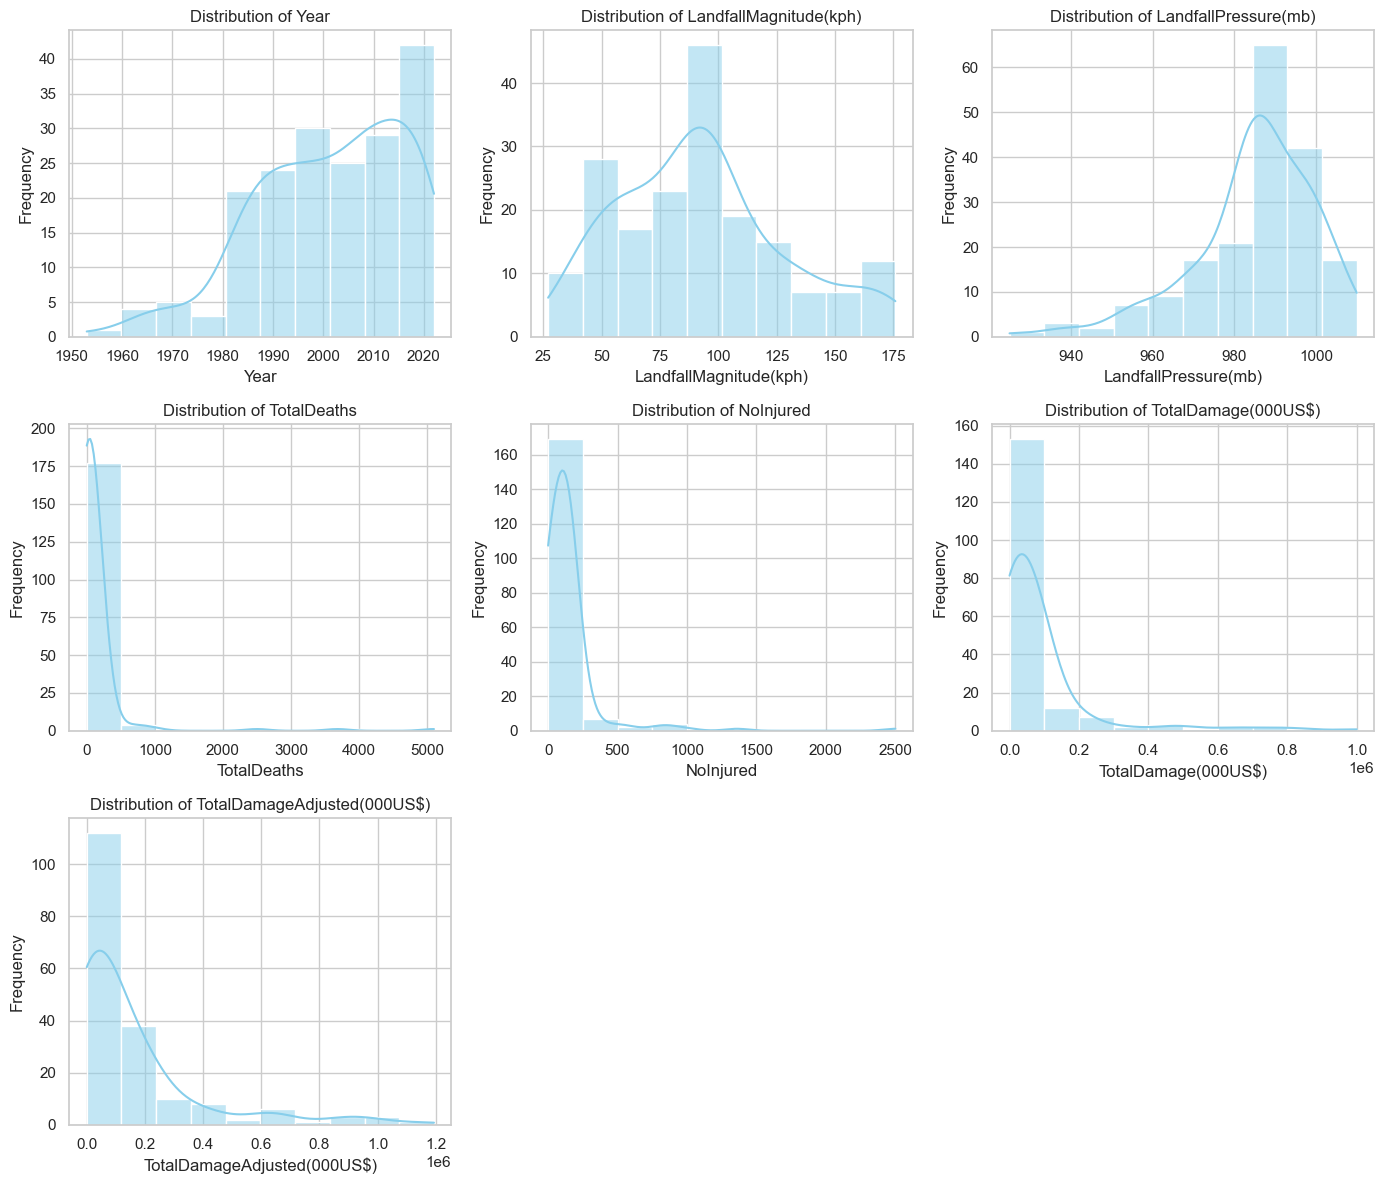

In [17]:
# mean df
plot_distributions(mean_df, columns_to_plot, plot_type='histplot')

The histograms reveal several insights about the data distribution:

- `Year`: The data spans from the `1950s to recent years`, with more frequent recordings in recent decades.
- `Landfall Magnitude`: Most storms have magnitudes `between 50-150 kph`, with a `few extreme cases`.
- `Landfall Pressure`: The pressure distribution appears somewhat normal, `centered around 980-990 mb`.
- `Total Deaths`: `Highly right-skewed`, indicating most storms cause relatively few deaths, but there are `some catastrophic events`.
- `Number of Injured`: Also `right-skewed`, following a `similar pattern to deaths`.
- `Total Damage`: `Extremely right-skewed`, suggesting most storms cause moderate damage, but some result in extreme financial losses.
- `Total Damage Adjusted`: `Similar to Total Damage`, but with `even more extreme right-skew`, possibly due to inflation adjustment.


Differences on Adjusted damage between median and mean are `small`

### Typhoon frequency in terms of landfall time and location

In [18]:
frequency_df = mean_df.copy()

In [19]:
x_label = ['NorthEast', 'NorthWest', 'Red River Delta', 'North Central Coast', 'South Central Coast', 'Central Highlands', 'SouthEast', 'Mekong River Delta']
map_dict = {i: name for i, name in enumerate(x_label, start=1)}

frequency_df['MainLandfallLocation'] = frequency_df['MainLandfallLocation'].map(map_dict)

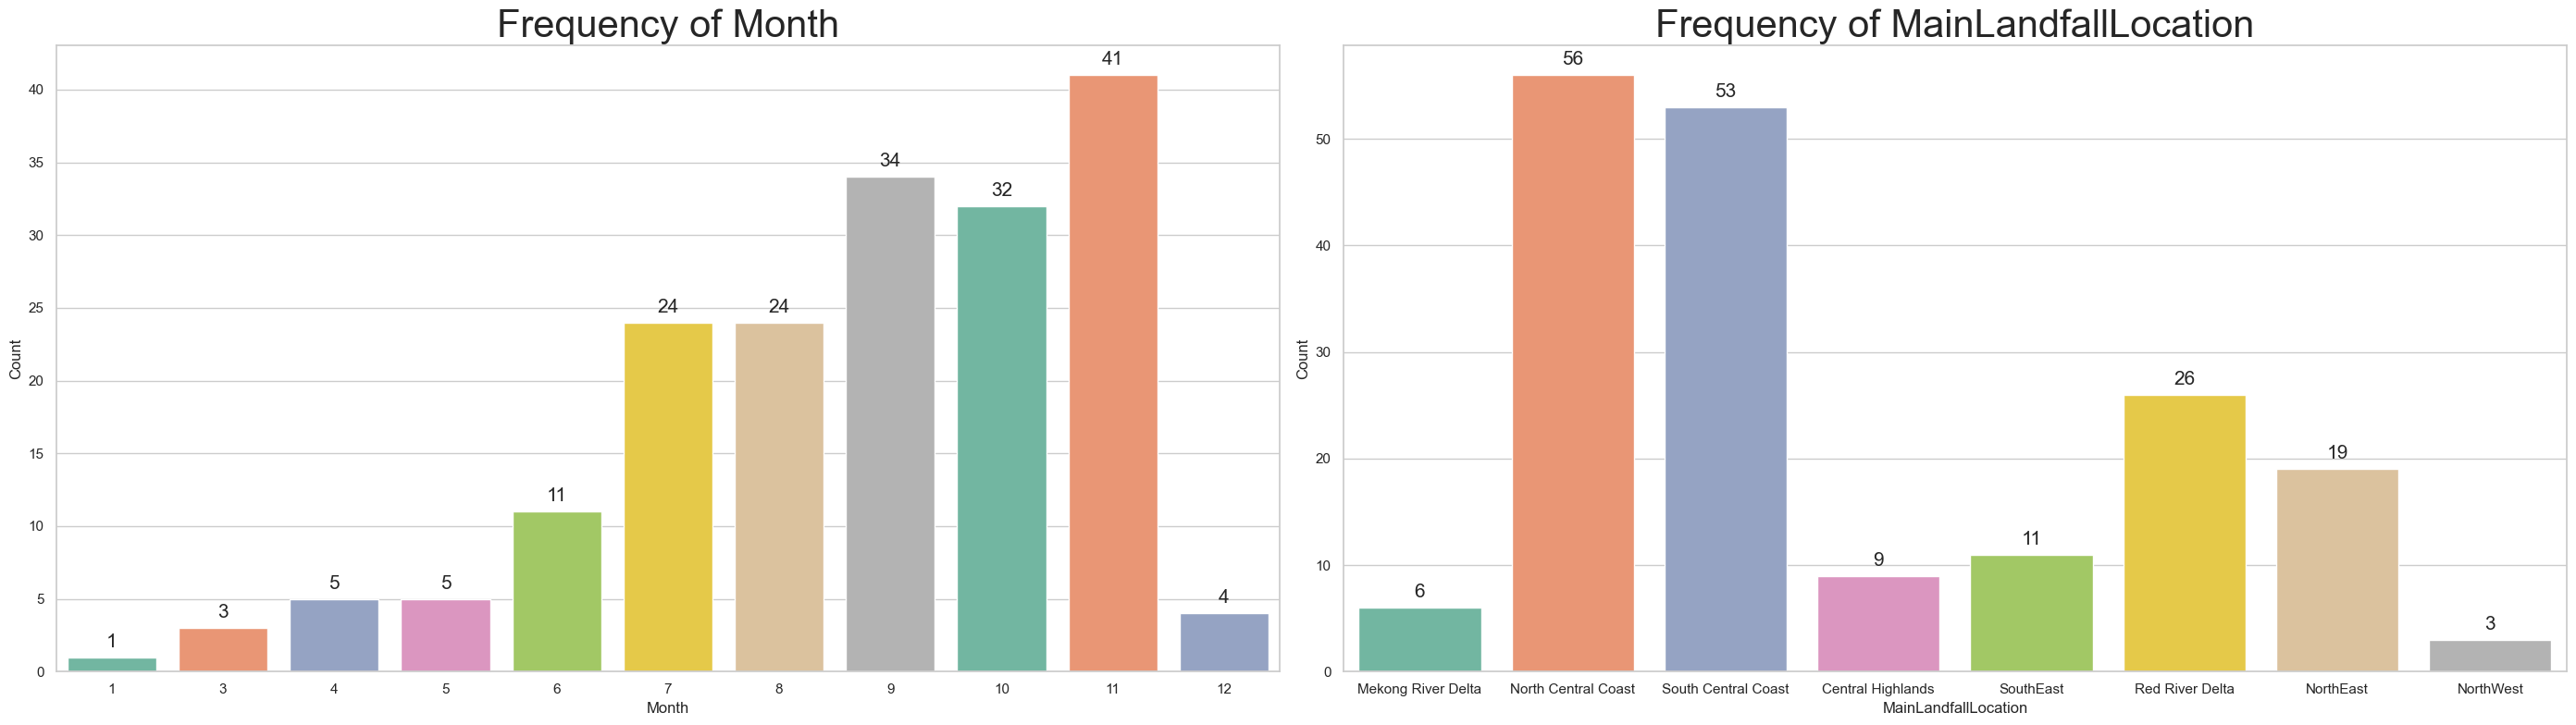

In [20]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = f"{y_value:.0f}"
        
        ax.annotate(label, (x_value, y_value), xytext=(0, spacing), fontsize=15, 
                    textcoords="offset points", ha='center', va='bottom')

categorical_columns = ['Month', 'MainLandfallLocation']

# Plotting the frequency of categorical variables
fig, axs = plt.subplots(1, 2, figsize=(28, 8))

# Plot each categorical column
for ax, col in zip(axs, categorical_columns):
    sns.countplot(x=frequency_df[col], ax=ax, palette='Set2', hue=frequency_df[col], legend=False)
    ax.set_title(f'Frequency of {col}', fontsize=30)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')  
    add_value_labels(ax)  

plt.tight_layout()
plt.show()

The bar plots provide insights into the temporal and geographical distribution of storms:

- Month: 
  - `October and November` are the peak months for storm activity.
  - There's a `clear storm season` from `June to December`, with very few storms in the first five months of the year.

- Main Landfall Location:
  - `The North Central Coast` experiences the `highest frequency` of storm landfalls, followed by the South Central Coast.
  - `The Central Highlands and Southeast` regions have the `lowest frequency` of direct storm landfalls.
  - This distribution aligns with Vietnam's geographical vulnerability to Pacific typhoons.

### 2. Noise

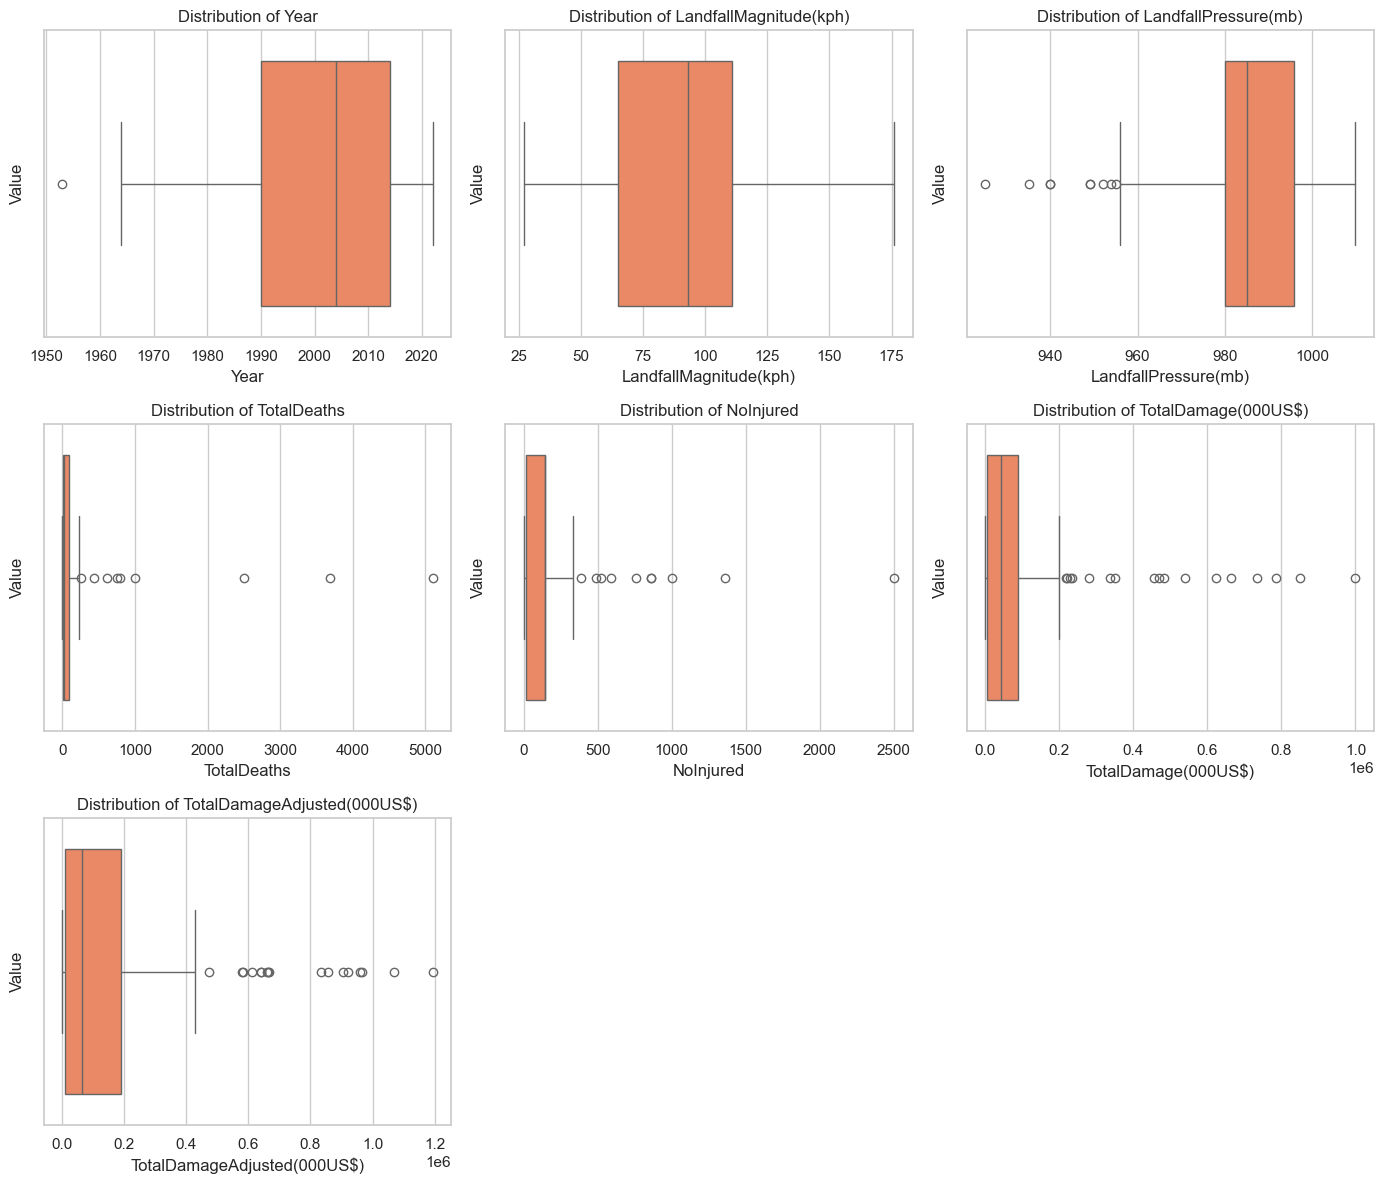

In [21]:
# mean
plot_distributions(mean_df, columns_to_plot, plot_type='boxplot')

The boxplots provide insights into the data's spread and potential outliers:

- `Year`: Shows a gradual increase over time, with some outliers in earlier years.
- `Landfall Magnitude`: `Relatively symmetrical distribution` with some `high-magnitude outliers`.
- `Landfall Pressure`: `Fairly symmetrical`, with few outliers.
- `Total Deaths`: `Highly skewed with many outliers on the high end`, indicating rare but devastating events.
- `Number of Injured`: Similar pattern to Total Deaths, but with even `more extreme outliers`.
- `Total Damage and Adjusted Damage`: Both show `extreme skewness and numerous high-value outliers`, suggesting a few storms cause disproportionate damage.


### 3. Correlation between attributes

In [22]:
# reverse to represent negative correlation
mean_df['LandfallPressure(mb)'] = -mean_df['LandfallPressure(mb)']

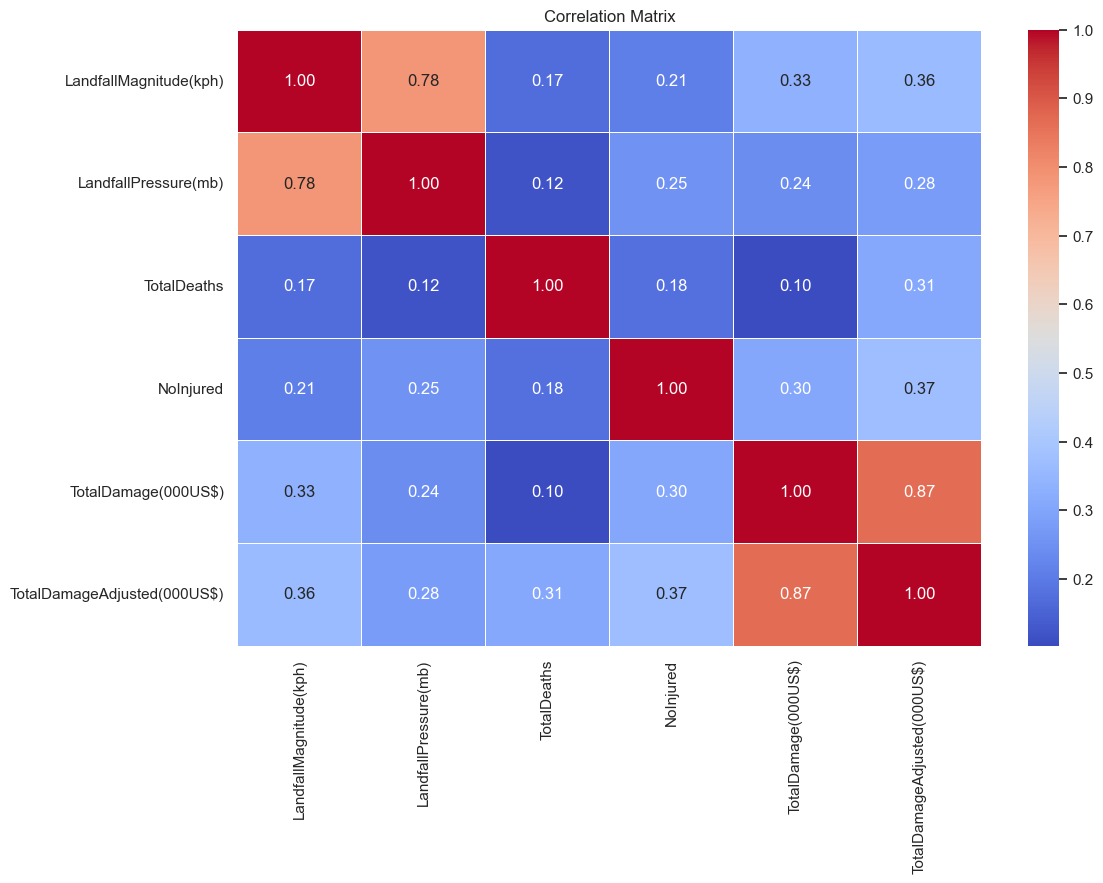

In [23]:
from src.utils import plot_corr
from src.const import LINEAR_NUMERICALS_COLS

plot_corr(mean_df, LINEAR_NUMERICALS_COLS)

The correlation matrix reveals several interesting relationships:

1. Correlation with `TotalDamageAdjusted` (1.00):
   - Most linear with `TotalDamage` (0.95) with CPI 
   - Less linear with `TotalDeath` (0.33)
   - Linear relationship with `NoInjured` (0.45), `LandfallMagnitude` (0.41), `LandfallPressure` (0.35), `TotalDeaths` (0.33) in Decending order

2. Correlation with `TotalDeaths` (1.00):
   - Weak relationship with other attribute (<0.2) except `TotalDamageAdjusted` (0.31)

3. Correlation with `NoInjured` (1.00):
   - Most correlation with `DamageAdjusted` (0.37)

# Test normalize & standardize

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

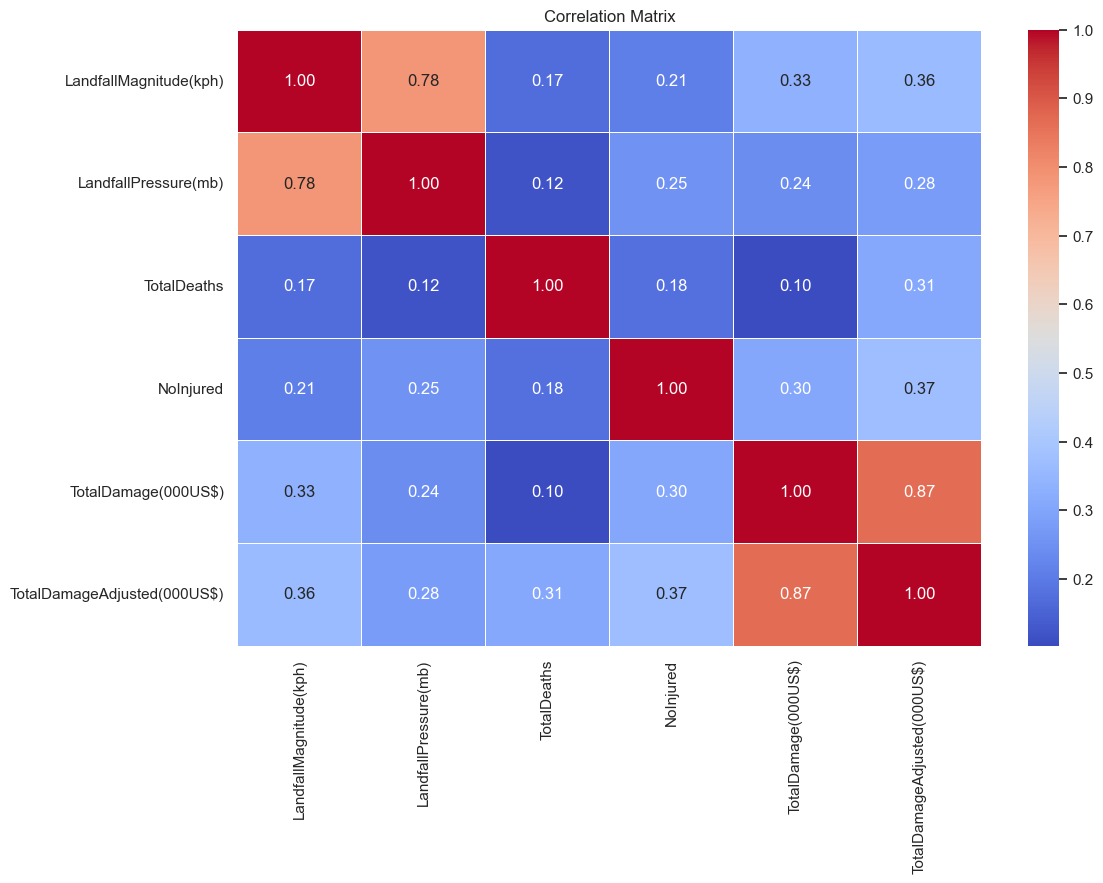

In [25]:
standard_scaler = StandardScaler()

ss_mean_df = mean_df.copy()
ss_mean_df[LINEAR_NUMERICALS_COLS] = standard_scaler.fit_transform(ss_mean_df[LINEAR_NUMERICALS_COLS])

plot_corr(ss_mean_df, LINEAR_NUMERICALS_COLS)

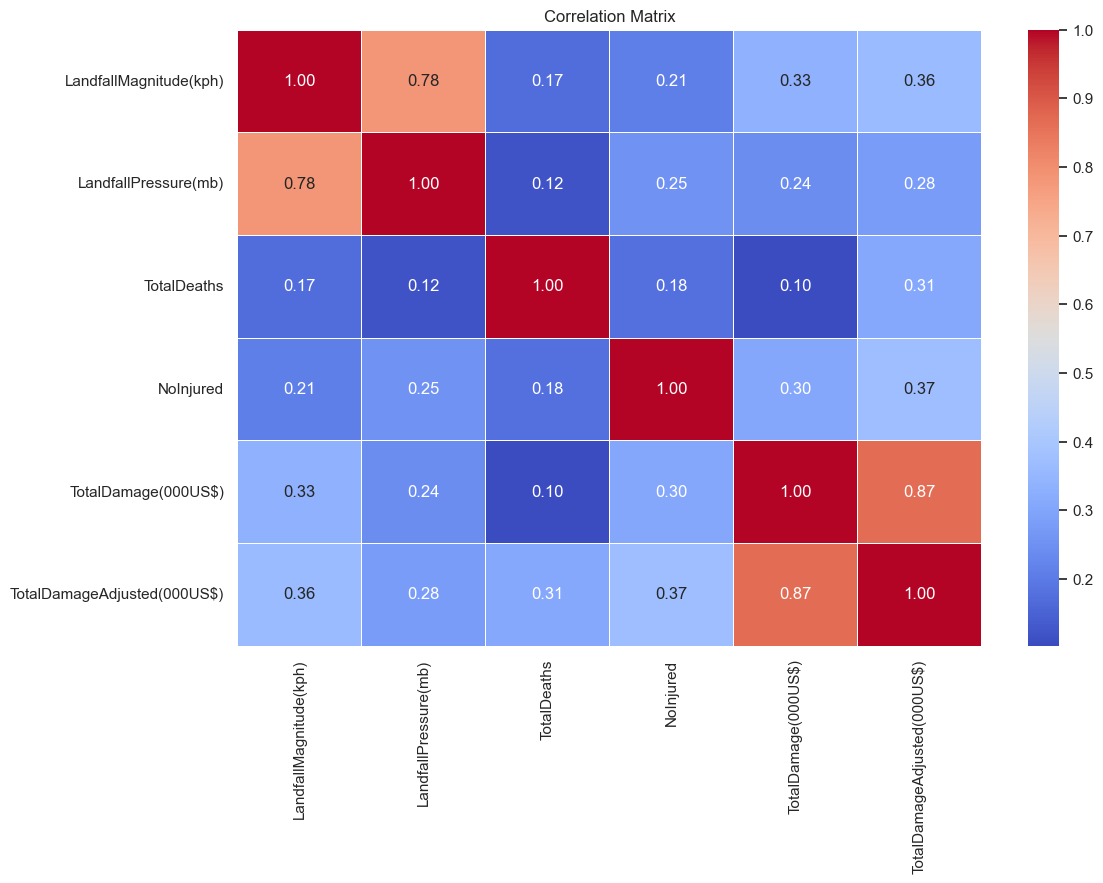

In [26]:
minmax_scaler = MinMaxScaler()

mm_mean_df = mean_df.copy()
mm_mean_df[LINEAR_NUMERICALS_COLS] = minmax_scaler.fit_transform(mm_mean_df[LINEAR_NUMERICALS_COLS])

plot_corr(mm_mean_df, LINEAR_NUMERICALS_COLS)